#### PINN (Physics Informed Neural Network) from scratch

TLDR - Use differential equation residuals as a loss function, instead of comparing sample points

#### 1D Heat Equation

$$
\frac{\partial u}{\partial t} = \alpha \frac{\partial^2 u}{\partial x^2}
$$



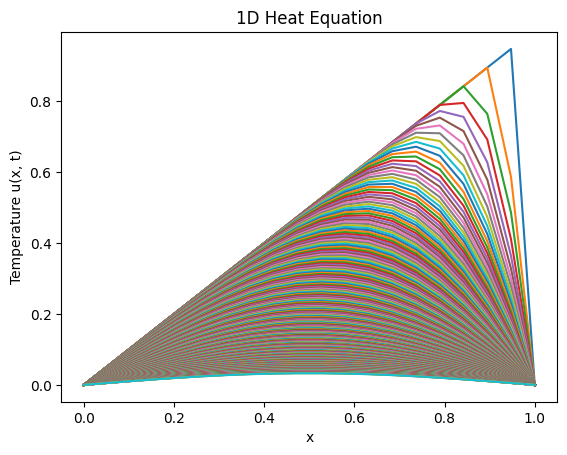

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Parameters
L = 1.0          # Length of the rod
T = 30          # Total time to simulate
alpha = 0.01     # Thermal diffusivity
nx = 20          # Number of spatial points
nt = 300         # Number of time steps
dx = L / (nx - 1)
dt = T / nt

# Stability condition (CFL condition)
assert alpha * dt / dx**2 <= 0.5, "Stability condition violated!"

# Grid
x = np.linspace(0, L, nx)

# Initial condition: sin(pi * x)
u = np.linspace(0, 1, nx)

# Dirichlet boundary conditions
u[0] = u[-1] = 0

# Store solutions for visualization
u_all = [u.copy()]

# Time-stepping loop (explicit method)
for n in range(1, nt):
    u_new = u.copy()
    for i in range(1, nx - 1):
        u_new[i] = u[i] + alpha * dt / dx**2 * (u[i+1] - 2*u[i] + u[i-1])
    u = u_new
    u[0] = u[-1] = 0  # Enforce boundary conditions
    u_all.append(u.copy())

# Visualization using animation
# fig, ax = plt.subplots()
# line, = ax.plot(x, u_all[0])
# ax.set_ylim(0, 1)

# def update(frame):
#     line.set_ydata(u_all[frame])
#     ax.set_title(f"Time = {frame * dt:.3f}")
#     return line,

# ani = animation.FuncAnimation(fig, update, frames=len(u_all), interval=30)
# plt.xlabel('x')
# plt.ylabel('Temperature u(x, t)')
# plt.title('1D Heat Equation')
# plt.show()
for u in u_all:
    plt.plot(x, u)
    

plt.xlabel('x')
plt.ylabel('Temperature u(x, t)')
plt.title('1D Heat Equation')
plt.show()
